In [9]:
from keras.datasets import reuters

In [14]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [15]:
# Decode
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 3s 5us/step


In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [22]:
from keras import models
from keras import layers

In [58]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [59]:
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [60]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 316us/step - loss: 2.3831 - accuracy: 0.5367 - val_loss: 1.5708 - val_accuracy: 0.6410
Epoch 2/9
7982/7982 [==============================] - 2s 268us/step - loss: 1.2914 - accuracy: 0.7206 - val_loss: 1.2164 - val_accuracy: 0.7380
Epoch 3/9
7982/7982 [==============================] - 2s 269us/step - loss: 0.9680 - accuracy: 0.7912 - val_loss: 1.0742 - val_accuracy: 0.7830
Epoch 4/9
7982/7982 [==============================] - 2s 274us/step - loss: 0.7556 - accuracy: 0.8385 - val_loss: 1.0031 - val_accuracy: 0.7920
Epoch 5/9
7982/7982 [==============================] - 2s 268us/step - loss: 0.5892 - accuracy: 0.8757 - val_loss: 0.9345 - val_accuracy: 0.8100
Epoch 6/9
7982/7982 [==============================] - 3s 320us/step - loss: 0.4731 - accuracy: 0.9020 - val_loss: 0.9073 - val_accuracy: 0.8150
Epoch 7/9
7982/7982 [==============================] - 2s 264us/step - loss: 0.365

In [45]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

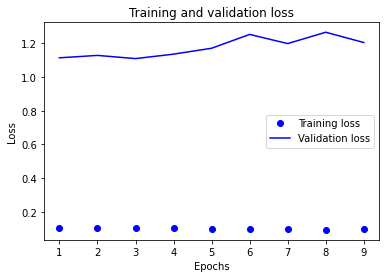

In [46]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

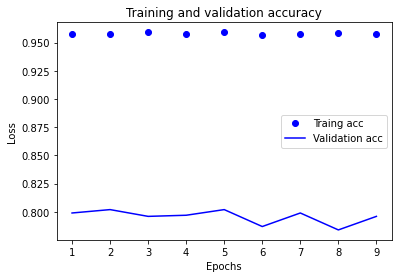

In [47]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Traing acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [48]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 291us/step


In [49]:
results

[1.3995557219878119, 0.7796081900596619]

In [50]:
predictions = model.predict(x_test)

In [57]:
predictions[0]

array([1.13868953e-06, 9.05855870e-07, 1.09322262e-09, 9.59693491e-01,
       3.31415683e-02, 1.09719518e-10, 8.07390058e-11, 5.54459120e-06,
       1.76339978e-04, 7.37291202e-07, 4.24514883e-06, 2.91885633e-04,
       2.69569700e-05, 3.44741466e-07, 1.13272435e-07, 4.61125049e-09,
       3.92254529e-04, 4.98012014e-07, 5.75999957e-06, 1.16806761e-04,
       5.73065132e-03, 3.33319360e-04, 4.60062921e-07, 1.23550885e-08,
       8.64905161e-08, 2.48292942e-08, 1.57959182e-12, 1.16113654e-07,
       6.39988684e-06, 3.72471725e-08, 4.21595723e-05, 1.97371799e-10,
       8.97736027e-06, 5.14804954e-09, 4.62767639e-06, 7.78821843e-08,
       1.36631725e-05, 2.81595405e-08, 4.76919297e-07, 8.30427616e-10,
       9.12753819e-08, 5.40055858e-08, 3.40864368e-08, 1.92970506e-09,
       1.06593120e-11, 9.47618234e-11], dtype=float32)

In [56]:
np.argmax(predictions[0])

3